# **Lõputöö "Naiste ja meeste lõpphinnete erinevuste uurimine Tartu Ülikooli informaatika eriala kursustel" andmeanalüüs**

# Anne-Mari Kasemetsa
# 2023/24

# **Eeltöötlus**
Vajalik iga järgneva bloki jooksutamiseks.
Eeltöötluses puhastatakse andmeid, jaotatakse õppeainete põhjal andmestikeks ning tegeletakse kordussooritustega

## Impordid

In [129]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/LOPUTOO')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [130]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency as chi2_contingency

## Puhastamine

In [131]:
path = os.getcwd() + '/' + 'loputoo_andmestik.xlsx'
df = pd.read_excel(path, sheet_name='Andmed')

In [132]:
df.head()

,TUDENGI_NR,SUGU,AINE,ÕPPEAASTA,SEMESTER,HINDE_NIMETUS_EK,KORDUSSOORITUS
0,216,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F - puudulik,NaN
1,415,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,mitteilmunud,NaN
2,467,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F - puudulik,NaN
3,572,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,D - rahuldav,NaN
4,702,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,A - suurepärane,NaN


In [133]:
# nimed muutujatesse
km = 'MTMM.00.340 Kõrgem matemaatika I (6 EAP)'
oop = 'LTAT.03.003 Objektorienteeritud programmeerimine (6 EAP)'
ab = 'LTAT.03.004 Andmebaasid (6 EAP)'
algod = 'LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP)'
opsys = 'LTAT.06.001 Operatsioonisüsteemid (6 EAP)'
dm = 'LTMS.00.019 Diskreetne matemaatika I (6 EAP)'

In [134]:
hinded = {'A - suurepärane' : 5, 'B - väga hea' : 4, 'C - hea' : 3, 'D - rahuldav' : 2,
          'E - kasin' : 1, 'F - puudulik' : 0, 'mitteilmunud': 0}

In [135]:
aastad = ['2018/19', '2019/20', '2020/21', '2021/22', '2022/23']

In [136]:
grades_mapping = {'A - suurepärane': 'A', 'B - väga hea': 'B', 'C - hea': 'C', 'D - rahuldav': 'D', 'E - kasin': 'E', 'F - puudulik': 'F', 'mitteilmunud': 'MI'}

In [137]:
hinnete_jarjekord = ['A', 'B', 'C', 'D', 'E', 'F', 'MI']

In [138]:
#lisan uue veeru, kus on hinded numbritena
df['HINNE_NR'] = df['HINDE_NIMETUS_EK'].map(hinded)
# muudan kordussoorituse puudumise märgise NaN-i nulliks
df['KORDUSSOORITUS'] = df['KORDUSSOORITUS'].fillna('0')
# muudan hinde_nimetus_ek nii, et hinne on ainult täht
grades_mapping = {'A - suurepärane': 'A', 'B - väga hea': 'B', 'C - hea': 'C', 'D - rahuldav': 'D', 'E - kasin': 'E', 'F - puudulik': 'F', 'mitteilmunud': 'MI'}
df['HINDE_NIMETUS_EK'] = df['HINDE_NIMETUS_EK'].replace(grades_mapping)
# muudan veergude nimesid
df = df.rename(columns={'HINDE_NIMETUS_EK': "HINNE_EK", "TUDENGI_NR": "ID"})
print(df)

        ID SUGU                                          AINE ÕPPEAASTA  \
0      216    M      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
1      415    N      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
2      467    M      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
3      572    N      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
4      702    M      MTMM.00.340 Kõrgem matemaatika I (6 EAP)   2019/20   
...    ...  ...                                           ...       ...   
8817  1052    N  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8818  2450    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8819   926    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8820   652    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   
8821  2394    M  LTMS.00.019 Diskreetne matemaatika I (6 EAP)   2022/23   

     SEMESTER HINNE_EK KORDUSSOORITUS  HINNE_NR  
0           S        F              0         0  

In [139]:
#andmestikud iga õppeaine kohta eraldi
KM = df[df['AINE'] == km]
OOP = df[df['AINE'] == oop]
AB = df[df['AINE'] == ab]
ALGOD = df[df['AINE'] == algod]
OPSYS = df[df['AINE'] == opsys]
DM = df[df['AINE'] == dm]

In [140]:
andmestikud = [KM, OOP, AB, ALGOD, OPSYS, DM]

# **Õppeainete analüüs**

## **KM analüüs**



1.   Tegeleme kordussooritustega
1.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
2.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
3.   Kui on, siis t-test, kui ei siis Mann Whitney U test
4.   Hinnete jaotuses tehti hii-ruut teste



### Kordusooritused

In [141]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

algne = KM.copy()
for student_id in KM['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = KM[KM['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            KM = KM.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            KM = KM.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
KM = KM.reset_index(drop=True)
unik_id_algne = algne['ID'].nunique()
unik_id_parast = KM['ID'].nunique()
print("Unikaasete ID arv algselt:", unik_id_algne)
print("Unikaalsete ID arv parast:", unik_id_parast)
print("Algselt ridu: ", algne.shape[0])
print("Parast ridu: ", KM.shape[0])
print("*********************************************************************")

Unikaasete ID arv algselt: 1888
Unikaalsete ID arv parast: 1888
Algselt ridu:  2523
Parast ridu:  1888
*********************************************************************


### hinnete analüüs - tabel hinnetest ning kogustest + statistilised näitajad

In [142]:
# kõrgema matemaatika hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[KM['ÕPPEAASTA'], KM['SUGU']], columns=KM['HINNE_EK'])
cross_tab.to_excel('KM_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E    F  MI
ÕPPEAASTA SUGU                             
2018/19   M     41  18  29  40  69   38   8
          N     27  21  18  24  27   13   6
2019/20   M     41  24  31  41  59   40   1
          N     23  18  20  25  43   34   2
2020/21   M     23  29  26  42  37   53   0
          N     16  13  31  25  11   20   0
2021/22   M     17  22  22  48  61   64   4
          N      8   7  16  29  43   22   4
2022/23   M     29  21  34  35  51  118   5
          N      8  12  17  23  23   36   2


In [143]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = KM.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('KM_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.111111    2.0  1.724879
1   2018/19    N  2.558824    2.0  1.733182
2   2019/20    M  2.257384    2.0  1.726292
3   2019/20    N  2.060606    2.0  1.720383
4   2020/21    M  2.047619    2.0  1.690848
5   2020/21    N  2.465517    3.0  1.595815
6   2021/22    M  1.663866    1.0  1.549614
7   2021/22    N  1.682171    1.0  1.397456
8   2022/23    M  1.542662    1.0  1.716875
9   2022/23    N  1.719008    1.0  1.587572

### kontrollime, kas normaaljaotusega - Shapiro test. Vastus: EI

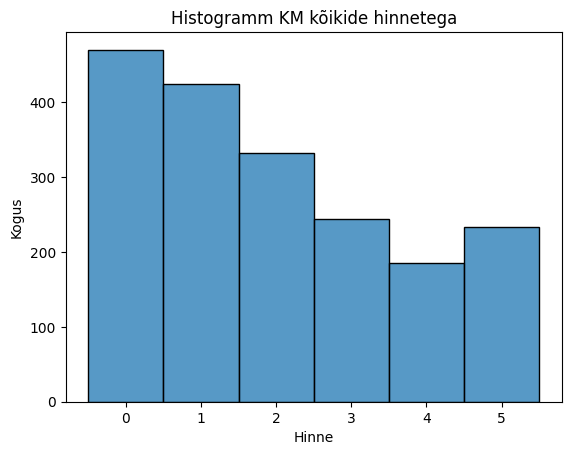

Shapiro-Wilk test KM kõikide hinnetega - p-val: 1.5724264497811709e-35
Ei ole normaaljaotus


In [144]:
# sorteerime hinnete järgi
KM_sorted = KM.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=KM_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm KM kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(KM['HINNE_NR'])
print(f'Shapiro-Wilk test KM kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann Whitney U test

In [145]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in KM['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = KM[(KM['ÕPPEAASTA'] == aasta) & (KM['SUGU'] == 'M')]['HINNE_NR']
  grades_f = KM[(KM['ÕPPEAASTA'] == aasta) & (KM['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])
  results = results._append(udf)

results.to_excel('KM_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2019/20    20901.5  0.230968    False
0  2018/19    14086.0  0.015292     True
0  2022/23    16184.0  0.148646    False
0  2021/22    14831.5  0.583024    False
0  2020/21    10355.0  0.022822     True


### Hii ruut


In [146]:
# kontroll, et väärtust ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E    F  MI
ÕPPEAASTA SUGU                             
2018/19   M     41  18  29  40  69   38   8
          N     27  21  18  24  27   13   6
2019/20   M     41  24  31  41  59   40   1
          N     23  18  20  25  43   34   2
2020/21   M     23  29  26  42  37   53   0
          N     16  13  31  25  11   20   0
2021/22   M     17  22  22  48  61   64   4
          N      8   7  16  29  43   22   4
2022/23   M     29  21  34  35  51  118   5
          N      8  12  17  23  23   36   2

In [147]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('KM_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,4.331602,0.037411,Jah,33.33,38.23
0,keskmised_hinded,0.283383,0.594492,Ei,39.56,40.93
0,halvad_hinded,8.735837,0.003120,Jah,27.11,20.84
0,A,0.000000,1.000000,Ei,12.37,12.29
0,B,0.693622,0.404935,Ei,9.34,10.64
0,C,4.821515,0.028107,Jah,11.63,15.29
0,D,1.078143,0.299113,Ei,16.87,18.89
0,E,0.069956,0.791400,Ei,22.69,22.04
0,F,11.123155,0.000853,Jah,25.63,18.74
0,MI,0.670304,0.412946,Ei,1.47,2.10


## **OOP analüüs**



1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste



### Kordussooritused

In [148]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

algne = OOP.copy()
for student_id in OOP['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = OOP[OOP['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            OOP = OOP.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            OOP = OOP.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
OOP = OOP.reset_index(drop=True)
unik_id_algne = algne['ID'].nunique()
unik_id_parast = OOP['ID'].nunique()
print("Unikaasete ID arv algselt:", unik_id_algne)
print("Unikaalsete ID arv parast:", unik_id_parast)
print("Algselt ridu: ", algne.shape[0])
print("Parast ridu: ", OOP.shape[0])
print("*********************************************************************")

Unikaasete ID arv algselt: 1372
Unikaalsete ID arv parast: 1372
Algselt ridu:  1505
Parast ridu:  1372
*********************************************************************


### hinnete analüüs + statistilised näitajad

In [149]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = OOP.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('OOP_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  3.120370    4.0  1.668965
1   2018/19    N  3.025316    3.0  1.739250
2   2019/20    M  3.712821    4.0  1.621247
3   2019/20    N  4.136986    5.0  1.407471
4   2020/21    M  3.455556    4.0  1.645452
5   2020/21    N  3.696203    4.0  1.563645
6   2021/22    M  3.677632    4.0  1.525075
7   2021/22    N  3.837838    4.0  1.375191
8   2022/23    M  3.829596    4.0  1.475818
9   2022/23    N  4.019802    4.0  1.363673

In [150]:
# hinnete analüüs - exceli tabelisse
cross_tab = pd.crosstab(index=[OOP['ÕPPEAASTA'], OOP['SUGU']], columns=OOP['HINNE_EK'])
cross_tab.to_excel('OOP_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      58  51  33  29  23  12  10
          N      21  16  13  15   1   7   6
2019/20   M      91  36  33  12   2   9  12
          N      43  16   5   4   0   3   2
2020/21   M      67  35  36  18   3  12   9
          N      30  26  10   3   2   8   0
2021/22   M      60  38  29   9   2   5   9
          N      30  21  14   4   0   3   2
2022/23   M     100  56  33  15   1  15   3
          N      48  32  10   4   0   4   3


### kontrollime normaaljaotust - Shapiro test. Vastus: EI

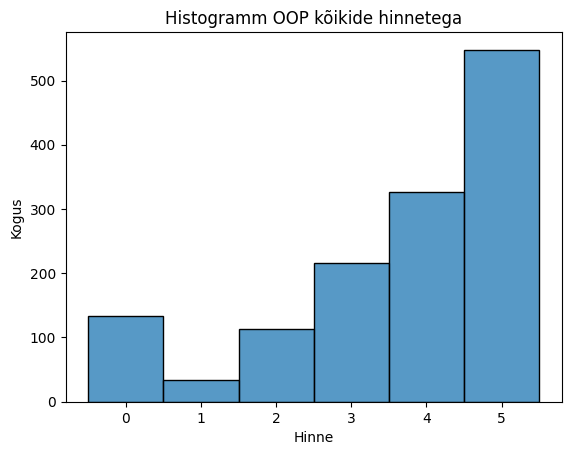

Shapiro-Wilk test OOP kõikide hinnetega - p-val: 4.124802744531644e-38
Ei ole normaaljaotus


In [151]:
# sorteerime hinnete järgi
OOP_sorted = OOP.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=OOP_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm OOP kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(OOP['HINNE_NR'])
print(f'Shapiro-Wilk test OOP kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitmany U test

In [152]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in OOP['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = OOP[(OOP['ÕPPEAASTA'] == aasta) & (OOP['SUGU'] == 'M')]['HINNE_NR']
  grades_f = OOP[(OOP['ÕPPEAASTA'] == aasta) & (OOP['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('OOP_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     8771.5  0.706897    False
0  2019/20     6004.5  0.034084     True
0  2021/22     5385.0  0.588098    False
0  2022/23    10505.0  0.302599    False
0  2020/21     6514.0  0.265124    False


### Hii ruut

In [153]:
# kontroll, ega ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      58  51  33  29  23  12  10
          N      21  16  13  15   1   7   6
2019/20   M      91  36  33  12   2   9  12
          N      43  16   5   4   0   3   2
2020/21   M      67  35  36  18   3  12   9
          N      30  26  10   3   2   8   0
2021/22   M      60  38  29   9   2   5   9
          N      30  21  14   4   0   3   2
2022/23   M     100  56  33  15   1  15   3
          N      48  32  10   4   0   4   3

In [154]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('OOP_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,2.916810,0.087661,Ei,78.26,82.51
0,keskmised_hinded,3.656838,0.055840,Ei,11.80,8.13
0,halvad_hinded,0.052776,0.818301,Ei,9.94,9.36
0,A,1.271281,0.259527,Ei,38.92,42.36
0,B,3.635240,0.056568,Ei,22.36,27.34
0,C,3.438394,0.063698,Ei,16.98,12.81
0,D,0.399749,0.527219,Ei,8.59,7.39
0,E,6.231519,0.012550,Jah,3.21,0.74
0,F,0.131253,0.717137,Ei,5.49,6.16
0,MI,0.842939,0.358558,Ei,4.45,3.20


## **Algode analüüüs**



1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste



### Kordussooritused

In [155]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

algne = ALGOD.copy()
for student_id in ALGOD['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = ALGOD[ALGOD['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            ALGOD = ALGOD.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            ALGOD = ALGOD.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
ALGOD = ALGOD.reset_index(drop=True)
unik_id_algne = algne['ID'].nunique()
unik_id_parast = ALGOD['ID'].nunique()
print("Unikaasete ID arv algselt:", unik_id_algne)
print("Unikaalsete ID arv parast:", unik_id_parast)
print("Algselt ridu: ", algne.shape[0])
print("Parast ridu: ", ALGOD.shape[0])
print("*********************************************************************")

Unikaasete ID arv algselt: 945
Unikaalsete ID arv parast: 945
Algselt ridu:  1147
Parast ridu:  945
*********************************************************************


### hinnete analüüs, statistilised näitajad

In [156]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = ALGOD.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('Algod_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.225806    2.0  1.430440
1   2018/19    N  2.571429    3.0  1.289909
2   2019/20    M  2.412587    2.0  1.602501
3   2019/20    N  2.500000    2.0  1.623310
4   2020/21    M  2.712644    3.0  1.785672
5   2020/21    N  2.894737    3.0  1.554765
6   2021/22    M  2.114754    2.0  1.575624
7   2021/22    N  2.361702    2.0  1.762231
8   2022/23    M  2.106667    2.0  1.787904
9   2022/23    N  1.727273    2.0  1.649406

In [157]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[ALGOD['ÕPPEAASTA'], ALGOD['SUGU']], columns=ALGOD['HINNE_EK'])
cross_tab.to_excel('Algod_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M      8  17  30  23  32   9   5
          N      3   5  10   9   7   1   0
2019/20   M     20  21  24  28  33  13   4
          N      5  10   0  10  10   2   1
2020/21   M     48  15  27  29  33  18   4
          N     10  13  12  10   7   5   0
2021/22   M     16  11  14  26  40  12   3
          N      9   5   7   6  13   7   0
2022/23   M     25  14  17  28  28  21  17
          N      5   3  10  10   8  17   2


### kontrollime normaaljaotust - Shapiro - vastus: EI

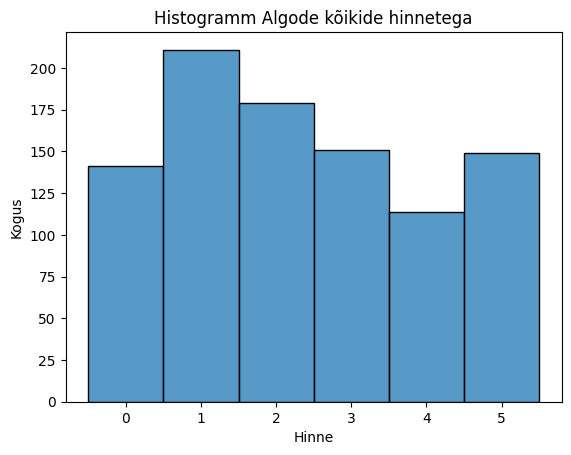

Shapiro-Wilk test Algod kõikide hinnetega - p-val: 1.4778728457689414e-23
Ei ole normaaljaotus


In [158]:
# sorteerime hinnete järgi
ALGOD_sorted = ALGOD.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=ALGOD_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm Algode kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(ALGOD['HINNE_NR'])
print(f'Shapiro-Wilk test Algod kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [159]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in ALGOD['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = ALGOD[(ALGOD['ÕPPEAASTA'] == aasta) & (ALGOD['SUGU'] == 'M')]['HINNE_NR']
  grades_f = ALGOD[(ALGOD['ÕPPEAASTA'] == aasta) & (ALGOD['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('Algod_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     1868.0  0.200214    False
0  2019/20     2643.5  0.795854    False
0  2022/23     4606.5  0.192242    False
0  2021/22     2674.0  0.489293    False
0  2020/21     4688.0  0.529668    False


### Hii ruut

In [160]:
# kontroll, ega ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M      8  17  30  23  32   9   5
          N      3   5  10   9   7   1   0
2019/20   M     20  21  24  28  33  13   4
          N      5  10   0  10  10   2   1
2020/21   M     48  15  27  29  33  18   4
          N     10  13  12  10   7   5   0
2021/22   M     16  11  14  26  40  12   3
          N      9   5   7   6  13   7   0
2022/23   M     25  14  17  28  28  21  17
          N      5   3  10  10   8  17   2

In [161]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('Algod_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,0.548575,0.458901,Ei,43.06,46.12
0,keskmised_hinded,0.648668,0.420589,Ei,42.08,38.79
0,halvad_hinded,0.000000,1.000000,Ei,14.87,15.09
0,A,0.716006,0.397457,Ei,16.41,13.79
0,B,3.039513,0.081260,Ei,10.94,15.52
0,C,0.086905,0.768149,Ei,15.71,16.81
0,D,0.011462,0.914741,Ei,18.79,19.40
0,E,1.307875,0.252780,Ei,23.28,19.40
0,F,1.893995,0.168752,Ei,10.24,13.79
0,MI,4.442467,0.035056,Jah,4.63,1.29


## **Diskmat analüüs**


1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste


### Kordussooritused

In [162]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

algne = DM.copy()
for student_id in DM['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = DM[DM['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            DM = DM.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            DM = DM.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
DM = DM.reset_index(drop=True)
unik_id_algne = algne['ID'].nunique()
unik_id_parast = DM['ID'].nunique()
print("Unikaasete ID arv algselt:", unik_id_algne)
print("Unikaalsete ID arv parast:", unik_id_parast)
print("Algselt ridu: ", algne.shape[0])
print("Parast ridu: ", DM.shape[0])
print("*********************************************************************")

Unikaasete ID arv algselt: 915
Unikaalsete ID arv parast: 915
Algselt ridu:  1198
Parast ridu:  915
*********************************************************************


### hinnete analüüs, statistilised näitajad

In [163]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = DM.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('DM_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.581967    2.0  1.552605
1   2018/19    N  2.428571    2.0  1.859659
2   2019/20    M  2.695946    3.0  1.732674
3   2019/20    N  2.869565    3.0  1.613949
4   2020/21    M  1.693069    1.0  1.707294
5   2020/21    N  1.827586    1.5  1.534834
6   2021/22    M  1.816327    1.0  1.626754
7   2021/22    N  1.545455    1.0  1.002837
8   2022/23    M  1.248619    1.0  1.386066
9   2022/23    N  1.227848    1.0  1.386282

In [164]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[DM['ÕPPEAASTA'], DM['SUGU']], columns=DM['HINNE_EK'])
cross_tab.to_excel('DM_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     21  16  19  32  25   1   8
          N     12   4   6   6  13   4   4
2019/20   M     35  22  18  23  36   3  11
          N      8  10  13   3   7   1   4
2020/21   M     12   7   9  16  24  21  12
          N      5   3  11  10  16   6   7
2021/22   M     13   5   8  17  35  17   3
          N      0   1   5   9  14   4   0
2022/23   M      4  13  15  38  33  78   0
          N      3   3   7  17  15  34   0


### kontrollime normaaljaotust - Shapiro - vastus: EI

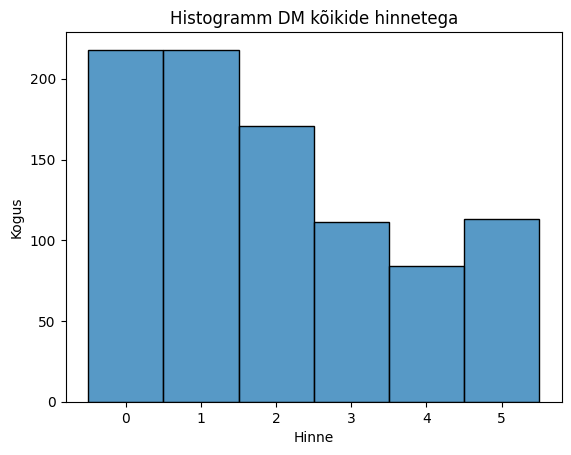

Shapiro-Wilk test DM kõikide hinnetega - p-val: 1.0311463434913864e-25
Ei ole normaaljaotus


In [165]:
# sorteerime hinnete järgi
DM_sorted = DM.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=DM_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm DM kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(DM['HINNE_NR'])
print(f'Shapiro-Wilk test DM kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [166]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in DM['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = DM[(DM['ÕPPEAASTA'] == aasta) & (DM['SUGU'] == 'M')]['HINNE_NR']
  grades_f = DM[(DM['ÕPPEAASTA'] == aasta) & (DM['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('DM_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     3199.5  0.465248    False
0  2021/22     1635.0  0.923422    False
0  2022/23     7201.5  0.922602    False
0  2020/21     2689.5  0.380793    False
0  2019/20     3234.5  0.605242    False


### Hii ruut

In [167]:
# kontroll, et ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     21  16  19  32  25   1   8
          N     12   4   6   6  13   4   4
2019/20   M     35  22  18  23  36   3  11
          N      8  10  13   3   7   1   4
2020/21   M     12   7   9  16  24  21  12
          N      5   3  11  10  16   6   7
2021/22   M     13   5   8  17  35  17   3
          N      0   1   5   9  14   4   0
2022/23   M      4  13  15  38  33  78   0
          N      3   3   7  17  15  34   0

In [168]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('DM_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,0.040067,0.841349,Ei,33.38,34.34
0,keskmised_hinded,0.101522,0.750011,Ei,42.92,41.51
0,halvad_hinded,0.003865,0.950428,Ei,23.69,24.15
0,A,0.876738,0.349097,Ei,13.08,10.57
0,B,0.509498,0.475356,Ei,9.69,7.92
0,C,4.358897,0.036816,Jah,10.62,15.85
0,D,0.566211,0.451768,Ei,19.38,16.98
0,E,0.054407,0.815565,Ei,23.54,24.53
0,F,0.000000,1.000000,Ei,18.46,18.49
0,MI,0.009990,0.920382,Ei,5.23,5.66


## **Andmebaasid analüüs**


1.   Jätame alles ainult viimase soorituse
2.   Leiame hinnete kogused ja statistilised näitajad - ekspordime tabeli excelisse
3.   Kontrollime, kas hinnete jaotus on normaaljaotusega - Shapiro-Wilk test
4.   Kui on, siis t-test, kui ei siis Mann Whitney U test
5.   Hinnete jaotuses tehti hii-ruut teste


### Kordussooritused

In [169]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

algne = AB.copy()
for student_id in AB['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = AB[AB['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            AB = AB.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            AB = AB.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
AB = AB.reset_index(drop=True)
unik_id_algne = algne['ID'].nunique()
unik_id_parast = AB['ID'].nunique()
print("Unikaasete ID arv algselt:", unik_id_algne)
print("Unikaalsete ID arv parast:", unik_id_parast)
print("Algselt ridu: ", algne.shape[0])
print("Parast ridu: ", AB.shape[0])
print("*********************************************************************")

Unikaasete ID arv algselt: 1238
Unikaalsete ID arv parast: 1238
Algselt ridu:  1377
Parast ridu:  1238
*********************************************************************


### hinnete analüüs, statistilised andmed

In [170]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = AB.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('AB_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  3.500000    4.0  1.604535
1   2018/19    N  3.637681    4.0  1.571539
2   2019/20    M  3.569620    4.0  1.713071
3   2019/20    N  3.750000    4.0  1.653194
4   2020/21    M  3.201342    4.0  1.819489
5   2020/21    N  3.698413    4.0  1.690914
6   2021/22    M  3.510204    4.0  1.415992
7   2021/22    N  3.802326    4.0  0.967954
8   2022/23    M  3.030568    3.0  1.642081
9   2022/23    N  3.339130    4.0  1.503720

In [171]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[AB['ÕPPEAASTA'], AB['SUGU']], columns=AB['HINNE_EK'])
cross_tab.to_excel('AB_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D  E   F  MI
ÕPPEAASTA SUGU                           
2018/19   M     58  37  33  15  0   7  12
          N     28  15  13   6  0   2   5
2019/20   M     67  31  31   6  0  23   0
          N     29  12   8   4  0   7   0
2020/21   M     47  35  26  12  0  25   4
          N     29  15   6   5  0   8   0
2021/22   M     39  47  37  11  0  10   3
          N     20  38  22   4  1   0   1
2022/23   M     41  65  66  14  3  27  13
          N     25  42  21  13  2   9   3


### kontrollime normaaljaotust - Shapiro - Vastus: EI

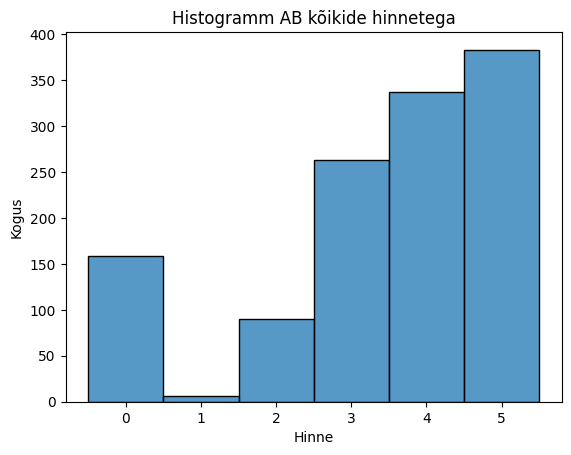

Shapiro-Wilk test AB kõikide hinnetega - p-val: 3.356511333304323e-35
Ei ole normaaljaotus


In [172]:
# sorteerime hinnete järgi
AB_sorted = AB.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=AB_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm AB kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(AB['HINNE_NR'])
print(f'Shapiro-Wilk test AB kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [173]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in AB['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = AB[(AB['ÕPPEAASTA'] == aasta) & (AB['SUGU'] == 'M')]['HINNE_NR']
  grades_f = AB[(AB['ÕPPEAASTA'] == aasta) & (AB['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('AB_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     5289.5  0.504100    False
0  2021/22     5852.5  0.325357    False
0  2022/23    11728.5  0.088631    False
0  2020/21     3865.0  0.035583     True
0  2019/20     4423.0  0.422125    False


### Hii ruut

In [174]:
# kontroll, et ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D  E   F  MI
ÕPPEAASTA SUGU                           
2018/19   M     58  37  33  15  0   7  12
          N     28  15  13   6  0   2   5
2019/20   M     67  31  31   6  0  23   0
          N     29  12   8   4  0   7   0
2020/21   M     47  35  26  12  0  25   4
          N     29  15   6   5  0   8   0
2021/22   M     39  47  37  11  0  10   3
          N     20  38  22   4  1   0   1
2022/23   M     41  65  66  14  3  27  13
          N     25  42  21  13  2   9   3

In [175]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('AB_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,2.488730,0.114664,Ei,78.11,82.19
0,keskmised_hinded,0.844337,0.358159,Ei,7.22,8.91
0,halvad_hinded,7.467557,0.006282,Jah,14.67,8.91
0,A,1.387537,0.238821,Ei,29.82,33.33
0,B,3.967371,0.046390,Jah,25.44,31.04
0,C,3.759093,0.052521,Ei,22.84,17.81
0,D,0.474659,0.490851,Ei,6.86,8.14
0,E,0.273933,0.600706,Ei,0.36,0.76
0,F,5.192052,0.022690,Jah,10.89,6.62
0,MI,1.438703,0.230349,Ei,3.79,2.29


## **Opsys analüüs**

### Kordussooritused

In [176]:
# iga õppeaine andmestik käiakse läbi, kus omakorda käiakse läbi kõik unikaalsed ID-d (mis esindab ühe ja sama õpilase hindeid)
# iga õpilase puhul jäetakse alles ainult kõige viimane sooritus
# seega pärast seda meetodit jääb iga õpilase puhul alles ainult üks lõpphinne ja see oli selle õpilase kõige viimasena sooritatud eksami tulemus

algne = OPSYS.copy()
for student_id in OPSYS['ID'].unique():
    # leiame mitu sooritust see tudeng selles aines tegi
    student_rows = OPSYS[OPSYS['ID'] == student_id]
    if len(student_rows) > 1:
        # kui on kordussooritusi
        if '*' in student_rows['KORDUSSOORITUS'].values:
            # kustutame kõik, mis ei ole kordussoorituse märgiga (kuna need on esimesed sooritused)
            OPSYS = OPSYS.drop(student_rows[student_rows['KORDUSSOORITUS'] == '0'].index)
            # kustutame kõik kordussoorituse märgiga, mis ei ole kõige viimane
            OPSYS = OPSYS.drop(student_rows[student_rows['KORDUSSOORITUS'] == '*'].index[:-1])
        else:
        # kui ei ole kordussooritusi, siis jääb ainult esimene sooritus
            pass
OPSYS = OPSYS.reset_index(drop=True)
unik_id_algne = algne['ID'].nunique()
unik_id_parast = OPSYS['ID'].nunique()
print("Unikaasete ID arv algselt:", unik_id_algne)
print("Unikaalsete ID arv parast:", unik_id_parast)
print("Algselt ridu: ", algne.shape[0])
print("Parast ridu: ", OPSYS.shape[0])
print("*********************************************************************")

Unikaasete ID arv algselt: 948
Unikaalsete ID arv parast: 948
Algselt ridu:  1072
Parast ridu:  948
*********************************************************************


### hinnete analyys, statistilised andmed

In [177]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = OPSYS.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

grade_summary.to_excel('opsys_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.370079    2.0  1.660958
1   2018/19    N  3.000000    3.0  1.632993
2   2019/20    M  2.980132    3.0  1.576791
3   2019/20    N  3.151515    3.0  1.563674
4   2020/21    M  3.005587    3.0  1.707542
5   2020/21    N  2.408163    2.0  1.706829
6   2021/22    M  2.880000    3.0  1.716147
7   2021/22    N  3.095238    3.0  1.693741
8   2022/23    M  3.019355    3.0  1.756143
9   2022/23    N  2.389831    2.0  1.531474

In [178]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[OPSYS['ÕPPEAASTA'], OPSYS['SUGU']], columns=OPSYS['HINNE_EK'])
cross_tab.to_excel('OPSYS_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     18  18  22  26  21   7  15
          N      7   5   5   5   4   2   0
2019/20   M     30  36  31  23  17  12   2
          N      8   8   5   8   1   0   3
2020/21   M     46  36  32  27  14   7  17
          N      7   9   6  11   7   3   6
2021/22   M     36  13  18  29  16   3  10
          N     12   8   7   6   5   3   1
2022/23   M     46  25  23  31   7   4  19
          N      6  10   9  19   6   7   2


### kontrollime normaaljaotust - Shapiro test - Vastus: EI

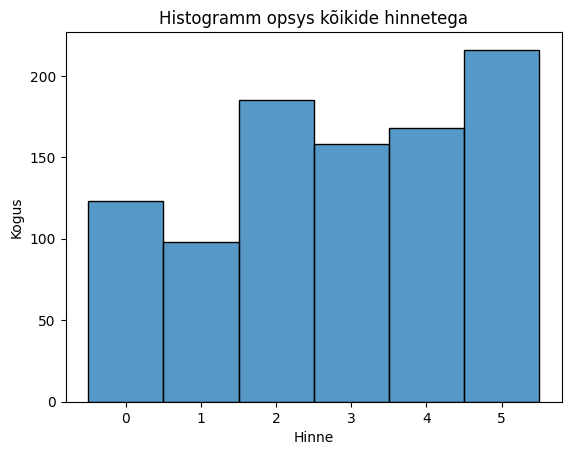

Shapiro-Wilk test opsys kõikide hinnetega - p-val: 2.574103818049322e-24
Ei ole normaaljaotus


In [179]:
# sorteerime hinnete järgi
OPSYS_sorted = OPSYS.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=OPSYS_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm opsys kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(OPSYS['HINNE_NR'])
print(f'Shapiro-Wilk test opsys kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### Mann-Whitney U test

In [180]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in OPSYS['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = OPSYS[(OPSYS['ÕPPEAASTA'] == aasta) & (OPSYS['SUGU'] == 'M')]['HINNE_NR']
  grades_f = OPSYS[(OPSYS['ÕPPEAASTA'] == aasta) & (OPSYS['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('opsys_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19     1398.0  0.073314    False
0  2019/20     2340.0  0.578889    False
0  2022/23     5608.5  0.009089     True
0  2021/22     2445.0  0.498909    False
0  2020/21     5266.5  0.028602     True


### Hii ruut

In [181]:
# kontroll, et ei ole üle kirjutatud
# cross_tab genereeriti hinnete analüüsi all
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     18  18  22  26  21   7  15
          N      7   5   5   5   4   2   0
2019/20   M     30  36  31  23  17  12   2
          N      8   8   5   8   1   0   3
2020/21   M     46  36  32  27  14   7  17
          N      7   9   6  11   7   3   6
2021/22   M     36  13  18  29  16   3  10
          N     12   8   7   6   5   3   1
2022/23   M     46  25  23  31   7   4  19
          N      6  10   9  19   6   7   2

In [182]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('OPSYS_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,1.647658,0.199278,Ei,58.34,53.08
0,keskmised_hinded,2.109064,0.146429,Ei,28.63,34.12
0,halvad_hinded,0.000000,1.000000,Ei,13.03,12.80
0,A,1.988769,0.158470,Ei,23.88,18.96
0,B,0.185714,0.666508,Ei,17.37,18.96
0,C,0.312125,0.576379,Ei,17.10,15.17
0,D,2.081884,0.149056,Ei,18.45,23.22
0,E,0.031111,0.859994,Ei,10.18,10.90
0,F,1.847191,0.174110,Ei,4.48,7.11
0,MI,1.471151,0.225164,Ei,8.55,5.69


# **Üldine analüüs**

Tähtis, et enne oleks õppeainete analüüs jooksutatud

Liidame kokku kõik andmestikud, kuna nendega tehti vahepeal kordusoorituste puhastust, seega algsed andmestikud enam ei sobi

In [183]:
df2 = pd.concat([KM, OOP, ALGOD, DM, AB, OPSYS], axis=0)
df2

,ID,SUGU,AINE,ÕPPEAASTA,SEMESTER,HINNE_EK,KORDUSSOORITUS,HINNE_NR
0,216,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,F,0,0
1,415,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,MI,0,0
2,572,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,D,0,2
3,702,M,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,A,0,5
4,956,N,MTMM.00.340 Kõrgem matemaatika I (6 EAP),2019/20,S,A,0,5
...,...,...,...,...,...,...,...,...
943,1943,M,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,B,0,4
944,1945,N,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,B,0,4
945,1947,M,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,D,0,2
946,1948,M,LTAT.06.001 Operatsioonisüsteemid (6 EAP),2020/21,S,C,0,3


### **Kontrollid ja mõned tabelid üldiselt andmete koguste kohta, palju andmeid saadi jne**

In [184]:
unique_counts = df.groupby('SUGU')['ID'].nunique()
unique_counts2 = df2.groupby('SUGU')['ID'].nunique()

print(unique_counts)
print(unique_counts2)

unique_id_count = df['ID'].nunique()
unique_id_count2 = df2['ID'].nunique()

print("Unikaased ID dfs:", unique_id_count)
print("Unikaalsed IDd df2s:", unique_id_count2)

SUGU
M    1603
N     860
Name: ID, dtype: int64
SUGU
M    1603
N     860
Name: ID, dtype: int64
Unikaased ID dfs: 2463
Unikaalsed IDd df2s: 2463


In [185]:
print(df2.groupby('AINE')['ID'].nunique())

AINE
LTAT.03.003 Objektorienteeritud programmeerimine (6 EAP)    1372
LTAT.03.004 Andmebaasid (6 EAP)                             1238
LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP)           945
LTAT.06.001 Operatsioonisüsteemid (6 EAP)                    948
LTMS.00.019 Diskreetne matemaatika I (6 EAP)                 915
MTMM.00.340 Kõrgem matemaatika I (6 EAP)                    1888
Name: ID, dtype: int64


In [186]:
print(len(df))
print(len(df2))

8822
7306


In [187]:
#igas õppeaines palju andmeid saadi iga aasta kohta
# metoodika peatüki tabeli jaoks
grades = df2.groupby(["AINE", "ÕPPEAASTA"])["HINNE_EK"].count()
grades.to_excel('hinded_kogus.xlsx')
print(grades)

AINE                                                      ÕPPEAASTA
LTAT.03.003 Objektorienteeritud programmeerimine (6 EAP)  2018/19      295
                                                          2019/20      268
                                                          2020/21      259
                                                          2021/22      226
                                                          2022/23      324
LTAT.03.004 Andmebaasid (6 EAP)                           2018/19      231
                                                          2019/20      218
                                                          2020/21      212
                                                          2021/22      233
                                                          2022/23      344
LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP)        2018/19      159
                                                          2019/20      181
                                

In [188]:
# Gruppeerime andmed aine ja lõpphinne järgi ning arvutame hinnete kogused
combined_data = pd.crosstab(index=[df2['ÕPPEAASTA'],df2['AINE'], df2['SUGU']], columns=df2['HINNE_EK'])
combined_data.to_excel('hinnetekogused.xlsx', index=True)
print(combined_data)

HINNE_EK                                                             A   B  \
ÕPPEAASTA AINE                                               SUGU            
2018/19   LTAT.03.003 Objektorienteeritud programmeerimin... M      58  51   
                                                             N      21  16   
          LTAT.03.004 Andmebaasid (6 EAP)                    M      58  37   
                                                             N      28  15   
          LTAT.03.005 Algoritmid ja andmestruktuurid (6 EAP) M       8  17   
                                                             N       3   5   
          LTAT.06.001 Operatsioonisüsteemid (6 EAP)          M      18  18   
                                                             N       7   5   
          LTMS.00.019 Diskreetne matemaatika I (6 EAP)       M      21  16   
                                                             N      12   4   
          MTMM.00.340 Kõrgem matemaatika I (6 EAP)           M  

### **Hinnete analüüs ja statistilised näitajad**

In [189]:
# kõikide aastate ning õppeainete peale naiste ja meeste õppetulemuste kogused
cross_tab = pd.crosstab(index=[df2['ÕPPEAASTA'], df2['SUGU']], columns=df2['HINNE_EK'])
cross_tab.to_excel('Koik_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK          A    B    C    D    E    F  MI
ÕPPEAASTA SUGU                                  
2018/19   M     204  157  166  165  170   74  58
          N      98   66   65   65   52   29  21
2019/20   M     284  170  168  133  147  100  30
          N     116   74   51   54   61   47  12
2020/21   M     243  157  156  144  111  136  46
          N      97   79   76   64   43   50  13
2021/22   M     181  136  128  140  154  111  32
          N      79   80   71   58   76   39   8
2022/23   M     245  194  188  161  123  263  57
          N      95  102   74   86   54  107  12


In [190]:
# hinnete aritmeetiline keskmine, mediaan ja standardhälve - exceli tabeliks
grade_summary = df2.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('koikide_grade_summary.xlsx')
grade_summary

ÕPPEAASTA SUGU  HINNE_NR                 
                      mean median       std
0   2018/19    M  2.661972    3.0  1.706696
1   2018/19    N  2.856061    3.0  1.723108
2   2019/20    M  2.923450    3.0  1.759263
3   2019/20    N  2.886747    3.0  1.813581
4   2020/21    M  2.729104    3.0  1.818955
5   2020/21    N  2.843602    3.0  1.729771
6   2021/22    M  2.570295    3.0  1.763594
7   2021/22    N  2.725061    3.0  1.674727
8   2022/23    M  2.445167    3.0  1.875830
9   2022/23    N  2.511321    3.0  1.807583

### **Normaaljaotuse kontroll**

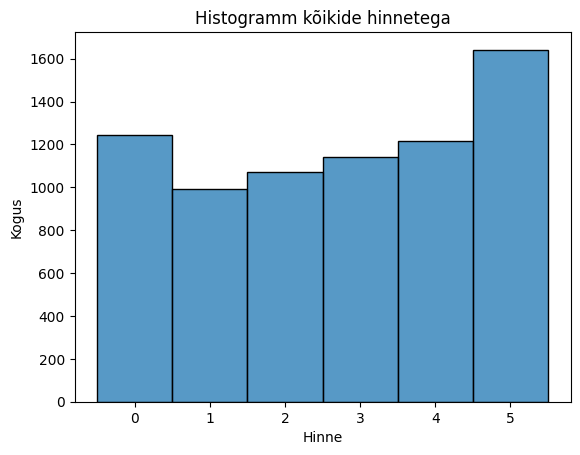

Shapiro-Wilk test kõikide hinnetega - p-val: 0.0
Ei ole normaaljaotus


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [191]:
# sorteerime hinnete järgi
df2_sorted = df2.sort_values(by='HINNE_NR', key=lambda x: x.map(grades_mapping))

# histogramm
sns.histplot(data=df2_sorted, x='HINNE_NR', bins=7, discrete=True)
plt.title('Histogramm kõikide hinnetega')
plt.xlabel('Hinne')
plt.ylabel('Kogus')
plt.show()

# Shapiro-Wilk test
stat, p_value = stats.shapiro(df2['HINNE_NR'])
print(f'Shapiro-Wilk test kõikide hinnetega - p-val: {p_value}')

alpha = 0.05
if p_value > alpha:
    print("Normaaljaotus")
else:
    print("Ei ole normaaljaotus")

### **Mann-Whitney U test**

In [192]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in df2['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = df2[(df2['ÕPPEAASTA'] == aasta) & (df2['SUGU'] == 'M')]['HINNE_NR']
  grades_f = df2[(df2['ÕPPEAASTA'] == aasta) & (df2['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('koikide_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2019/20   215986.5  0.793600    False
0  2018/19   183922.5  0.052718    False
0  2022/23   320130.5  0.526989    False
0  2021/22   172396.0  0.150692    False
0  2020/21   203016.5  0.346878    False


### **Hii ruut test**

In [193]:
cross_tab

HINNE_EK          A    B    C    D    E    F  MI
ÕPPEAASTA SUGU                                  
2018/19   M     204  157  166  165  170   74  58
          N      98   66   65   65   52   29  21
2019/20   M     284  170  168  133  147  100  30
          N     116   74   51   54   61   47  12
2020/21   M     243  157  156  144  111  136  46
          N      97   79   76   64   43   50  13
2021/22   M     181  136  128  140  154  111  32
          N      79   80   71   58   76   39   8
2022/23   M     245  194  188  161  123  263  57
          N      95  102   74   86   54  107  12

In [194]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('koikide_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,2.748311,0.097357,Ei,54.11,56.26
0,keskmised_hinded,0.000000,1.000000,Ei,28.22,28.20
0,halvad_hinded,4.733429,0.029582,Jah,17.67,15.55
0,A,0.036106,0.849296,Ei,22.54,22.31
0,B,7.169182,0.007417,Jah,15.86,18.45
0,C,0.033938,0.853840,Ei,15.71,15.50
0,D,0.344280,0.557369,Ei,14.48,15.04
0,E,0.392746,0.530860,Ei,13.74,13.16
0,F,0.825108,0.363691,Ei,13.33,12.51
0,MI,6.551335,0.010481,Jah,4.35,3.04


# **Moodulite analüüs**

Tähtis, et enne oleks õppeainete analüüs jooksutatud

Moodustame uued andmestikud õigete õppeainetega

In [195]:
matad = pd.concat([KM, DM], axis=0)
itkad = pd.concat([AB, OPSYS], axis=0)
proged = pd.concat([OOP, ALGOD], axis = 0)

## **matade analüüs**

### Hinnete analüüs ja statistilised näitajad

In [196]:
# kõikide õpitulemuste aritmeetiline keskmine, mediaan ja standardhälve
grade_summary = matad.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('matade_grade_summary.xlsx')

In [197]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[matad['ÕPPEAASTA'], matad['SUGU']], columns=matad['HINNE_EK'])
cross_tab.to_excel('matad_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E    F  MI
ÕPPEAASTA SUGU                             
2018/19   M     62  34  48  72  94   39  16
          N     39  25  24  30  40   17  10
2019/20   M     76  46  49  64  95   43  12
          N     31  28  33  28  50   35   6
2020/21   M     35  36  35  58  61   74  12
          N     21  16  42  35  27   26   7
2021/22   M     30  27  30  65  96   81   7
          N      8   8  21  38  57   26   4
2022/23   M     33  34  49  73  84  196   5
          N     11  15  24  40  38   70   2


### Mann-Whitney U test

In [198]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in matad['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = matad[(matad['ÕPPEAASTA'] == aasta) & (matad['SUGU'] == 'M')]['HINNE_NR']
  grades_f = matad[(matad['ÕPPEAASTA'] == aasta) & (matad['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('matad_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2019/20    43251.0  0.182995    False
0  2018/19    31096.5  0.123550    False
0  2022/23    44897.5  0.258893    False
0  2021/22    26681.0  0.715051    False
0  2020/21    23753.0  0.023143     True


### Hii ruut test

In [199]:
cross_tab

HINNE_EK         A   B   C   D   E    F  MI
ÕPPEAASTA SUGU                             
2018/19   M     62  34  48  72  94   39  16
          N     39  25  24  30  40   17  10
2019/20   M     76  46  49  64  95   43  12
          N     31  28  33  28  50   35   6
2020/21   M     35  36  35  58  61   74  12
          N     21  16  42  35  27   26   7
2021/22   M     30  27  30  65  96   81   7
          N      8   8  21  38  57   26   4
2022/23   M     33  34  49  73  84  196   5
          N     11  15  24  40  38   70   2

In [200]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('matade_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,3.749072,0.052837,Ei,33.35,37.12
0,keskmised_hinded,0.021232,0.884149,Ei,40.73,41.09
0,halvad_hinded,5.538199,0.018606,Jah,25.92,21.78
0,A,0.306920,0.579576,Ei,12.61,11.80
0,B,0.078415,0.779457,Ei,9.46,9.87
0,C,9.421740,0.002144,Jah,11.28,15.45
0,D,0.115451,0.734021,Ei,17.74,18.35
0,E,0.008487,0.926598,Ei,22.98,22.75
0,F,7.075801,0.007813,Jah,23.14,18.67
0,MI,0.140728,0.707558,Ei,2.78,3.11


## **IT ainete analüüs**

### hinnete analüüs ja statistilised näitajad

In [201]:
# kõikide õpitulemuste aritmeetiline keskmine, mediaan ja standardhälve
grade_summary = itkad.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('ITde_grade_summary.xlsx')

In [202]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[itkad['ÕPPEAASTA'], itkad['SUGU']], columns=itkad['HINNE_EK'])
cross_tab.to_excel('itkad_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     76  55  55  41  21  14  27
          N     35  20  18  11   4   4   5
2019/20   M     97  67  62  29  17  35   2
          N     37  20  13  12   1   7   3
2020/21   M     93  71  58  39  14  32  21
          N     36  24  12  16   7  11   6
2021/22   M     75  60  55  40  16  13  13
          N     32  46  29  10   6   3   2
2022/23   M     87  90  89  45  10  31  32
          N     31  52  30  32   8  16   5


### Mann-Whitney U test

In [203]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in itkad['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = itkad[(itkad['ÕPPEAASTA'] == aasta) & (itkad['SUGU'] == 'M')]['HINNE_NR']
  grades_f = itkad[(itkad['ÕPPEAASTA'] == aasta) & (itkad['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('itkad_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19    11891.0  0.022355     True
0  2021/22    15565.5  0.079823    False
0  2022/23    34020.0  0.723285    False
0  2020/21    17939.5  0.706166    False
0  2019/20    12994.0  0.149914    False


### Hii ruut test

In [204]:
cross_tab

HINNE_EK         A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                            
2018/19   M     76  55  55  41  21  14  27
          N     35  20  18  11   4   4   5
2019/20   M     97  67  62  29  17  35   2
          N     37  20  13  12   1   7   3
2020/21   M     93  71  58  39  14  32  21
          N     36  24  12  16   7  11   6
2021/22   M     75  60  55  40  16  13  13
          N     32  46  29  10   6   3   2
2022/23   M     87  90  89  45  10  31  32
          N     31  52  30  32   8  16   5

In [205]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('itde_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,1.871602,0.171292,Ei,68.90,72.02
0,keskmised_hinded,0.050627,0.821977,Ei,17.19,17.72
0,halvad_hinded,4.839804,0.027810,Jah,13.91,10.26
0,A,0.286820,0.592266,Ei,27.05,28.31
0,B,6.214038,0.012674,Jah,21.68,26.82
0,C,2.811513,0.093590,Ei,20.16,16.89
0,D,0.424338,0.514781,Ei,12.26,13.41
0,E,0.252335,0.615436,Ei,4.93,4.30
0,F,0.621583,0.430460,Ei,7.90,6.79
0,MI,5.068569,0.024363,Jah,6.01,3.48


## **proge ainte analüüs**

### hinnete analüüs ja statistilised näitajad

In [206]:
# kõikide õpitulemuste aritmeetiline keskmine, mediaan ja standardhälve
grade_summary = proged.groupby(['ÕPPEAASTA', 'SUGU']).agg({'HINNE_NR': ['mean', 'median', 'std']}).reset_index()

# exceli tabeliks
grade_summary.to_excel('progede_grade_summary.xlsx')

In [207]:
# hinnete analüüs - exceli tabeliks
cross_tab = pd.crosstab(index=[proged['ÕPPEAASTA'], proged['SUGU']], columns=proged['HINNE_EK'])
cross_tab.to_excel('proged_hinnetekogused.xlsx', index=True)
print(cross_tab)

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      66  68  63  52  55  21  15
          N      24  21  23  24   8   8   6
2019/20   M     111  57  57  40  35  22  16
          N      48  26   5  14  10   5   3
2020/21   M     115  50  63  47  36  30  13
          N      40  39  22  13   9  13   0
2021/22   M      76  49  43  35  42  17  12
          N      39  26  21  10  13  10   2
2022/23   M     125  70  50  43  29  36  20
          N      53  35  20  14   8  21   5


### Mann-Whitney U test

In [208]:
# iga aasta kohta eraldi Mann Whitney U test

results = pd.DataFrame(columns=['Aasta', 'Statistik', 'p', 'Olulisus'])

for aasta in proged['ÕPPEAASTA'].unique():
  # eraldame naiste ja meeste hinded sellel aastal
  grades_m = proged[(proged['ÕPPEAASTA'] == aasta) & (proged['SUGU'] == 'M')]['HINNE_NR']
  grades_f = proged[(proged['ÕPPEAASTA'] == aasta) & (proged['SUGU'] == 'N')]['HINNE_NR']

  # Mann-Whintey U test
  stat, p_value = mannwhitneyu(grades_m, grades_f)

  udf = pd.DataFrame({'Aasta': aasta,
                      'Statistik': stat,
                      'p': p_value,
                      'Olulisus': p_value < 0.05}, index=[0])

  results = results._append(udf)

results.to_excel('proged_mannwhitneyu_results.xlsx', index=False)

print(results)

     Aasta  Statistik         p Olulisus
0  2018/19    18770.5  0.609857    False
0  2019/20    16080.5  0.020062     True
0  2021/22    15052.5  0.136784    False
0  2022/23    28433.5  0.672160    False
0  2020/21    22312.0  0.199092    False


### Hii ruut test

In [209]:
cross_tab

HINNE_EK          A   B   C   D   E   F  MI
ÕPPEAASTA SUGU                             
2018/19   M      66  68  63  52  55  21  15
          N      24  21  23  24   8   8   6
2019/20   M     111  57  57  40  35  22  16
          N      48  26   5  14  10   5   3
2020/21   M     115  50  63  47  36  30  13
          N      40  39  22  13   9  13   0
2021/22   M      76  49  43  35  42  17  12
          N      39  26  21  10  13  10   2
2022/23   M     125  70  50  43  29  36  20
          N      53  35  20  14   8  21   5

In [210]:
# hinnete grupeeringute Hii ruut test

hinnete_grupid = {
    'head_hinded': ['A', 'B', 'C'],
    'keskmised_hinded': ['D', 'E'],
    'halvad_hinded': ['F', 'MI']
}

# nii gruppide kui ka individuaalsete hinnete tulemused kirjutame samasse tabelisse
results = pd.DataFrame(columns=['Hinne', 'statistik', 'p', 'Kas oluline', 'meeste protsent', 'naiste protsent'])

for grupp, hinded in hinnete_grupid.items():
    grades_m = cross_tab.xs('M', level='SUGU')[hinded].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinded].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    # kogus neid hindeid kõikidest oma soo hinnetest
    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    # Hii ruut
    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    gdf = pd.DataFrame({'Hinne': grupp,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(gdf)

# hii ruut test hinnetele eraldi
for hinne in ['A', 'B', 'C', 'D', 'E', 'F', 'MI']:

    grades_m = cross_tab.xs('M', level='SUGU')[hinne].sum().sum()
    total_grades_m = cross_tab.xs('M', level='SUGU').sum().sum()

    grades_f = cross_tab.xs('N', level='SUGU')[hinne].sum().sum()
    total_grades_f = cross_tab.xs('N', level='SUGU').sum().sum()

    prop_grades_m = grades_m / total_grades_m
    prop_grades_f = grades_f / total_grades_f

    chi2, p, _, _ = chi2_contingency([[grades_m, total_grades_m - grades_m],
                                      [grades_f, total_grades_f - grades_f]])

    if p < 0.05:
        olulisus = 'Jah'
    else:
        olulisus = 'Ei'

    hdf = pd.DataFrame({'Hinne': hinne,
                        'statistik': chi2,
                        'p': p,
                        'Kas oluline': olulisus,
                        'meeste protsent': round(prop_grades_m * 100, 2),
                        'naiste protsent': round(prop_grades_f * 100, 2)}, index=[0])
    results = results._append(hdf)

# kõik tulemused samasse tabelisse
results.to_excel('proged_hiiruut.xlsx', index=True)
results

,Hinne,statistik,p,Kas oluline,meeste protsent,naiste protsent
0,head_hinded,6.972750,0.008276,Jah,63.31,69.28
0,keskmised_hinded,7.212541,0.007240,Jah,24.66,19.28
0,halvad_hinded,0.102180,0.749229,Ei,12.03,11.44
0,A,1.378281,0.240394,Ei,29.36,31.97
0,B,8.820107,0.002979,Jah,17.51,23.04
0,C,1.481593,0.223525,Ei,16.44,14.26
0,D,0.472275,0.491943,Ei,12.92,11.76
0,E,8.224888,0.004132,Jah,11.73,7.52
0,F,1.109995,0.292083,Ei,7.50,8.93
0,MI,4.425696,0.035402,Jah,4.53,2.51
